# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
import os

os.listdir("../input")

['mnist-numbers', 'celeba', 'helper-functions', 'chechpoints']

In [ ]:
os.listdir("../Output")

In [2]:
# import module we'll need to import our custom module
from shutil import copyfile

# copy our file into the working directory (make sure it has .py suffix)
copyfile(src = "../input/helper-functions/helper.py", dst = "../working/helper.py")

copyfile(src = "../input/helper-functions/problem_unittests.py", dst = "../working/problem_unittests.py")

# import all our functions
from helper import *
from problem_unittests import *

In [ ]:
os.listdir("../input/mnist-numbers/mnist/mnist")

In [3]:
data_dir = "../input"

In [ ]:
from glob import glob
glob(os.path.join(data_dir, 'mnist-numbers/mnist/mnist/*.jpg'))

## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

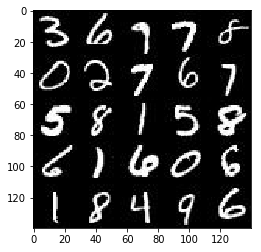

In [4]:
show_n_images = 25



"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = get_batch(glob(os.path.join(data_dir, 'mnist-numbers/mnist/mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(images_square_grid(mnist_images, 'L'), cmap='gray')


### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

In [ ]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = get_batch(glob(os.path.join(data_dir, 'celeba/img_align_celeba/img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(images_square_grid(mnist_images, 'RGB'))

mnist_images.shape

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.13.1
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    input_real = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels], name = 'input_real')
    
    input_z = tf.placeholder(tf.float32, [None, z_dim], name = 'input_z')
    
    learn_rate = tf.placeholder(tf.float32, name = "learn_rate")

    return input_real, input_z, learn_rate



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False, alpha = 0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    #Function to create discriminator forward pass
  
    with tf.variable_scope('discriminator', reuse=reuse):
      
        # Input layer is 28x28x1
        
        x1 = tf.layers.conv2d(images, filters = 64, kernel_size = 4, strides = 2, padding =  'SAME')
        x1 = tf.nn.leaky_relu(x1, alpha)
        #14 x 14 x 128
        
        x2 = tf.layers.conv2d(x1, filters = 128, kernel_size = 4, strides = 2, padding =  'SAME')
        x2 = tf.layers.batch_normalization(x2, training = True)
        x2 = tf.nn.leaky_relu(x2, alpha)
        #7 x 7 x 256
        
        x3 = tf.layers.conv2d(x2, filters = 256, kernel_size = 4, strides = 2, padding =  'SAME')
        x3 = tf.layers.batch_normalization(x3, training = True)
        x3 = tf.nn.leaky_relu(x3, alpha)
        #4 x 4 x 512
        
        flat = tf.reshape(x3, [-1, 4*4*256])
        logits = tf.contrib.layers.fully_connected(flat, 1, activation_fn = None)
        
        out = tf.nn.sigmoid(logits)
        

    return (out, logits)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [33]:
def generator(z, out_channel_dim = 3, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    reuse = not is_train
    
    with tf.variable_scope('generator', reuse = reuse):
      
        # First fully connected layer
        x1 = tf.contrib.layers.fully_connected(z, 4 * 4 * 512, activation_fn = None)
        x1 = tf.reshape(x1, [-1, 4, 4, 512])
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        x1 = tf.nn.relu(x1)
        #x1 = tf.maximum(alpha * x1, x1)
        # 3 x 3 x 512
        
        #conv layer
        x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides = 1, padding = 'VALID')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.nn.relu(x2)
        #x2 = tf.maximum(alpha * x2, x2)
        #7 X 7 X 256
        
        #CONV layer
        x3 = tf.layers.conv2d_transpose(x2, 128, 4, strides = 2, padding = 'SAME')
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        x3 = tf.nn.relu(x3)
        #x3 = tf.maximum(alpha * x3, x3)
        #14 X 14 X 128
        
        #CONV layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 4, strides = 2, padding = 'SAME')
        #28 X 28 X 3
        
        out = tf.tanh(logits)
      
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


In [9]:
celeb_shape = (28, 28, 3)

z_dim = 100

batch_size = 128

z_dim = 100

learning_rate = 0.0002

beta1 = 0.5


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
graph = tf.Graph()
    
with graph.as_default():
    
    input_real, input_z, learnrate = model_inputs(*celeb_shape, z_dim)
    
    gen_output = generator(input_z, 3, is_train=True)
    
    _, D_logits_real = discriminator(input_real, reuse=False)
    
    _, D_logits_fake = discriminator(gen_output, reuse= True)
    

    



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
#tests.test_model_loss(model_loss)

"\nDON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE\n"

In [11]:


with graph.as_default():
    
    D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = (tf.ones_like(D_logits_real) * (1 -0.1)), 
                                                                         logits = D_logits_real))
    
    
    D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = tf.zeros_like(D_logits_fake), 
                                                                         logits = D_logits_fake))
    
    
    D_loss_total = D_loss_real + D_loss_fake
        
        
    G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = tf.ones_like(D_logits_fake), 
                                                                         logits = D_logits_fake))

In [12]:

with graph.as_default():

    t_vars = tf.trainable_variables()
    
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
      
        D_opt = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1=beta1).minimize(D_loss_total, var_list=d_vars)
        G_opt = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1=beta1).minimize(G_loss, var_list=g_vars)

### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})
    
    images_grid = images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

Epoch is 1/50 Generator loss: 1.361589..... Discriminator loss: 1.077695..


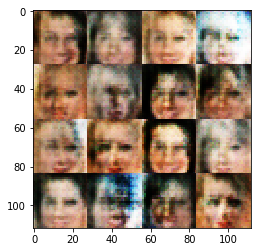

Epoch is 2/50 Generator loss: 0.917589..... Discriminator loss: 1.139498..


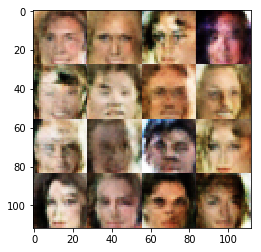

Epoch is 3/50 Generator loss: 0.925276..... Discriminator loss: 1.123727..


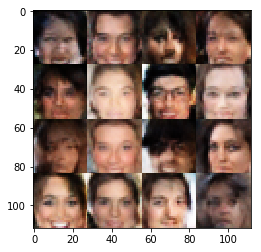

Epoch is 4/50 Generator loss: 1.088047..... Discriminator loss: 0.978041..


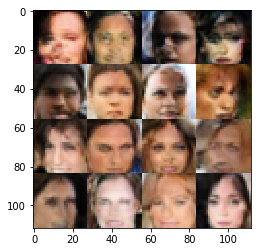

Epoch is 5/50 Generator loss: 0.967795..... Discriminator loss: 1.383241..


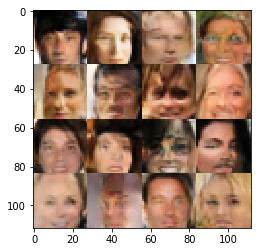

Epoch is 6/50 Generator loss: 1.090205..... Discriminator loss: 1.144132..


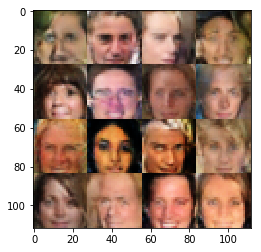

Epoch is 7/50 Generator loss: 0.698858..... Discriminator loss: 1.310901..


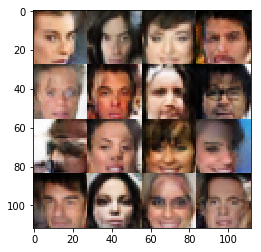

Epoch is 8/50 Generator loss: 0.915091..... Discriminator loss: 1.479991..


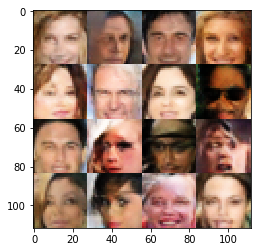

Epoch is 9/50 Generator loss: 1.032204..... Discriminator loss: 1.226828..


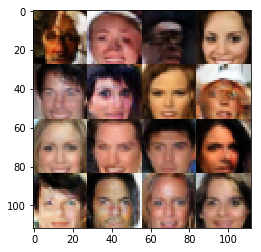

Epoch is 10/50 Generator loss: 0.960962..... Discriminator loss: 1.195409..


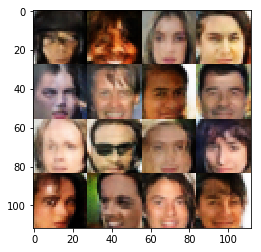

Epoch is 11/50 Generator loss: 1.079852..... Discriminator loss: 1.106451..


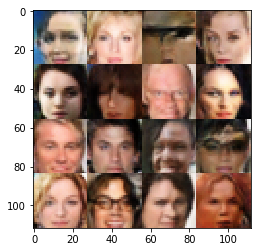

Epoch is 12/50 Generator loss: 1.128443..... Discriminator loss: 1.125882..


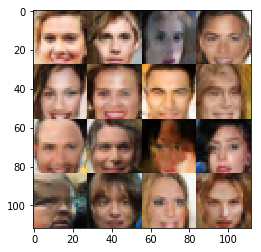

Epoch is 13/50 Generator loss: 1.039958..... Discriminator loss: 1.214130..


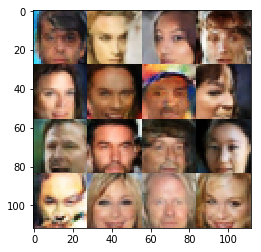

Epoch is 14/50 Generator loss: 0.862429..... Discriminator loss: 1.213751..


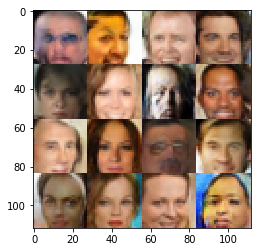

Epoch is 15/50 Generator loss: 0.682503..... Discriminator loss: 1.261768..


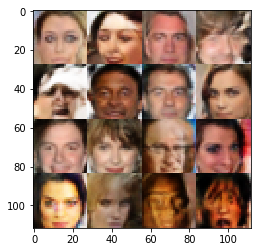

Epoch is 16/50 Generator loss: 0.945759..... Discriminator loss: 1.140963..


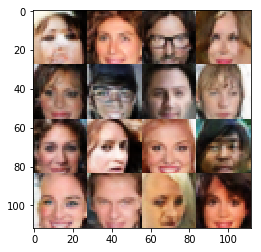

Epoch is 17/50 Generator loss: 0.795656..... Discriminator loss: 1.117336..


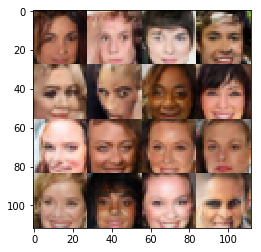

Epoch is 18/50 Generator loss: 1.120869..... Discriminator loss: 1.033504..


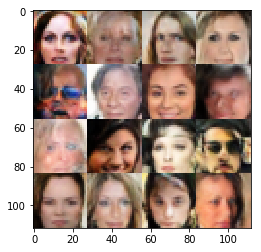

Epoch is 19/50 Generator loss: 0.854864..... Discriminator loss: 1.070025..


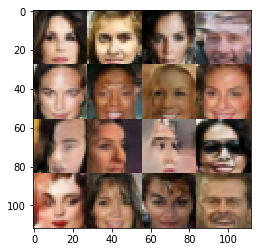

Epoch is 20/50 Generator loss: 0.887319..... Discriminator loss: 1.038890..


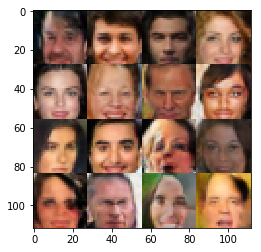

Epoch is 21/50 Generator loss: 1.027406..... Discriminator loss: 0.969905..


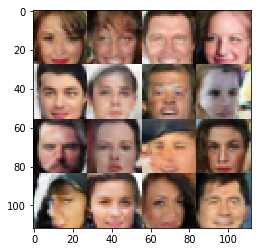

Epoch is 22/50 Generator loss: 1.023539..... Discriminator loss: 1.131429..


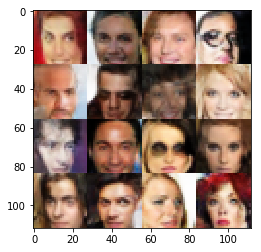

Epoch is 23/50 Generator loss: 1.248367..... Discriminator loss: 0.951514..


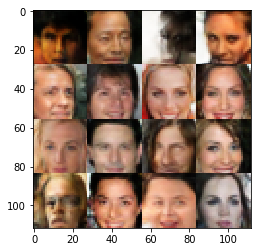

Epoch is 24/50 Generator loss: 1.625846..... Discriminator loss: 0.868921..


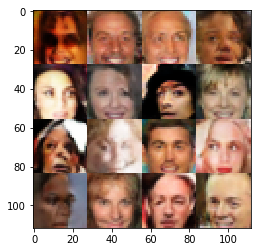

Epoch is 25/50 Generator loss: 0.777162..... Discriminator loss: 1.183991..


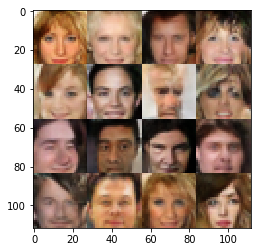

Epoch is 26/50 Generator loss: 0.988833..... Discriminator loss: 1.148730..


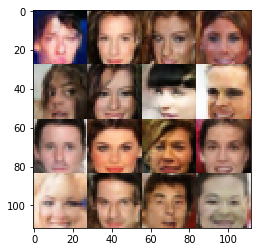

Epoch is 27/50 Generator loss: 0.769106..... Discriminator loss: 1.171846..


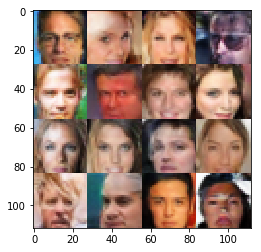

Epoch is 28/50 Generator loss: 0.891330..... Discriminator loss: 1.048265..


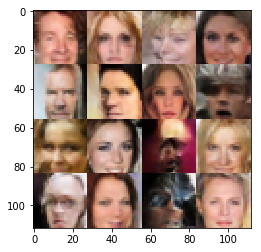

Epoch is 29/50 Generator loss: 1.123266..... Discriminator loss: 0.894586..


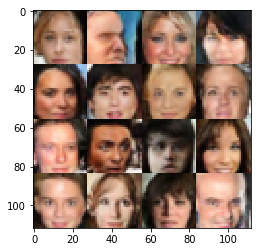

Epoch is 30/50 Generator loss: 1.029995..... Discriminator loss: 1.012781..


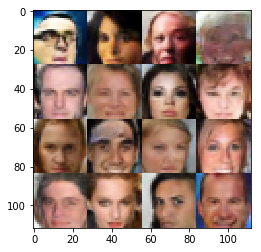

Epoch is 31/50 Generator loss: 1.001733..... Discriminator loss: 1.020789..


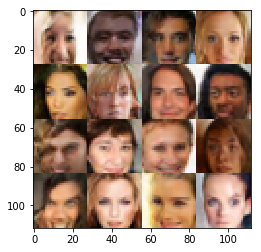

Epoch is 32/50 Generator loss: 1.009041..... Discriminator loss: 0.961209..


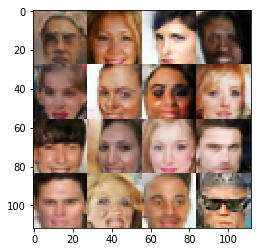

Epoch is 33/50 Generator loss: 1.024319..... Discriminator loss: 0.985682..


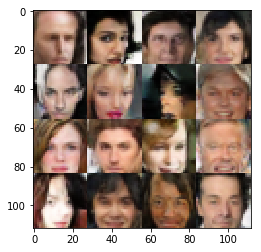

Epoch is 34/50 Generator loss: 0.979551..... Discriminator loss: 0.986398..


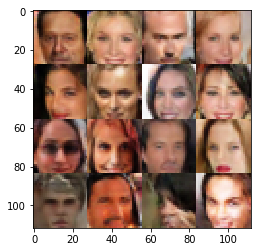

Epoch is 35/50 Generator loss: 1.200333..... Discriminator loss: 0.932979..


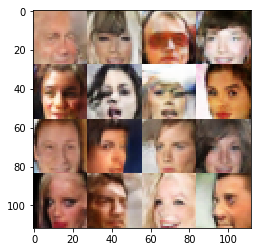

Epoch is 36/50 Generator loss: 1.104359..... Discriminator loss: 0.937150..


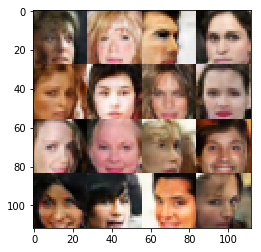

Epoch is 37/50 Generator loss: 0.587013..... Discriminator loss: 1.427227..


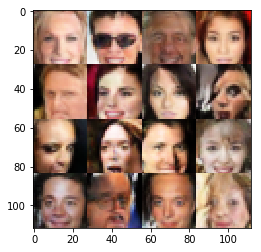

Epoch is 38/50 Generator loss: 1.616487..... Discriminator loss: 0.883191..


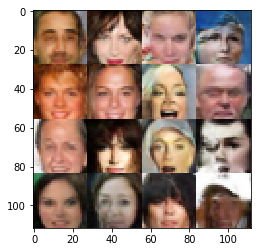

Epoch is 39/50 Generator loss: 1.017418..... Discriminator loss: 0.979536..


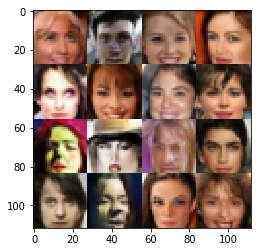

Epoch is 40/50 Generator loss: 1.488939..... Discriminator loss: 0.792769..


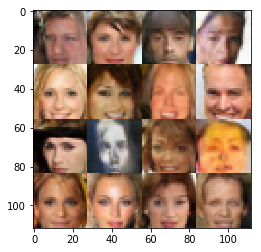

Epoch is 41/50 Generator loss: 1.561606..... Discriminator loss: 0.885605..


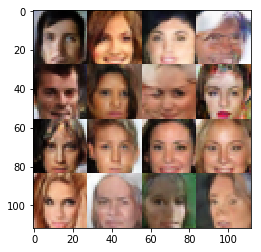

Epoch is 42/50 Generator loss: 1.551133..... Discriminator loss: 0.823999..


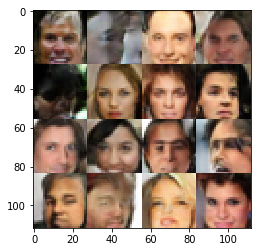

Epoch is 43/50 Generator loss: 1.583874..... Discriminator loss: 0.732768..


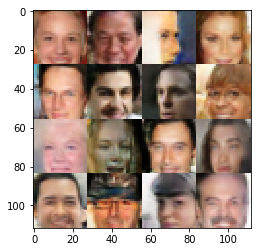

Epoch is 44/50 Generator loss: 1.999112..... Discriminator loss: 0.752092..


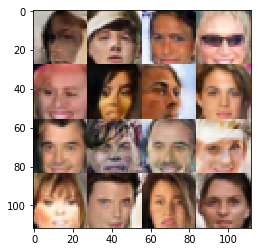

Epoch is 45/50 Generator loss: 1.122305..... Discriminator loss: 0.911870..


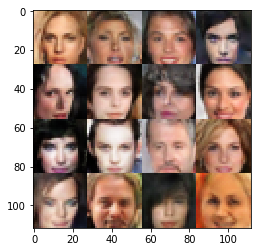

Epoch is 46/50 Generator loss: 1.868391..... Discriminator loss: 0.680934..


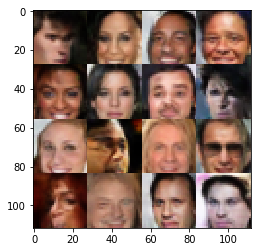

Epoch is 47/50 Generator loss: 2.330350..... Discriminator loss: 1.039374..


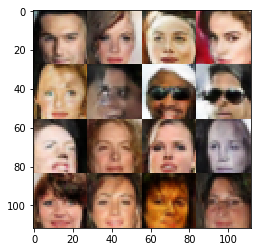

Epoch is 48/50 Generator loss: 1.314406..... Discriminator loss: 0.780648..


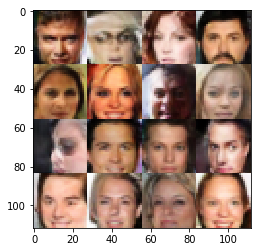

Epoch is 49/50 Generator loss: 1.583255..... Discriminator loss: 0.747105..


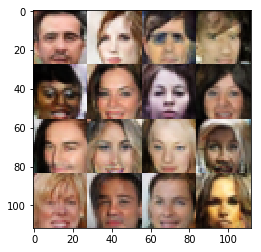

Epoch is 50/50 Generator loss: 1.065825..... Discriminator loss: 0.929885..


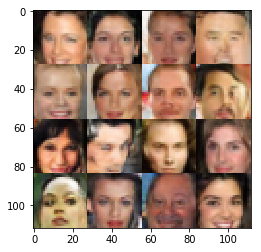

In [15]:
epochs = 50

celeba_dataset = Dataset('celeba', glob(os.path.join(data_dir, 'celeba/img_align_celeba/img_align_celeba/*.jpg')))

with graph.as_default():
    
    saver = tf.train.Saver(var_list = g_vars)
    
with tf.Session(graph = graph) as sess:
    
    sess.run(tf.global_variables_initializer())
        
    
    for epoch_i in range(epochs):
                
        for batch_images in celeba_dataset.get_batches(batch_size): 
            
            batch_images = batch_images * 2
            
            batch_z = np.random.uniform(-1, 1, size = (batch_size, z_dim))
            
            _ = sess.run(D_opt, feed_dict = {input_real:batch_images, input_z: batch_z,\
                                                 learnrate : learning_rate})
            
            _ = sess.run(G_opt, feed_dict = {input_z: batch_z, input_real : batch_images,\
                                                learnrate : learning_rate})
                
        #end of each epoch, calculate loss
        Genloss = sess.run(G_loss, feed_dict = {input_z: batch_z, input_real : batch_images,\
                                                   learnrate : learning_rate})
        
        Disloss = sess.run(D_loss_total, {input_real: batch_images, input_z: batch_z,\
                                       learnrate : learning_rate})
            
            
        print('Epoch is {}/{}' .format (epoch_i + 1, epochs),
              "Generator loss: {:4f}.....". format(Genloss),
              "Discriminator loss: {:4f}..".format(Disloss))
            
            
        show_generator_output(sess, 16, input_z, 3, celeba_dataset.image_mode) 
            
        saver.save(sess, './checkpoints/generator_restz.ckpt')
        
                


                
                
                
               
                
                
            
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [ ]:
# batch_size = 128
# z_dim = 100
# learning_rate = 0.0002
# beta1 = 0.5


# """
# DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
# """
# epochs = 20

# mnist_dataset = Dataset('mnist', glob(os.path.join(data_dir, 'mnist-numbers/mnist/mnist/*.jpg')))
# with tf.Graph().as_default():
#     train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
#           mnist_dataset.shape, mnist_dataset.image_mode)

In [2]:
#with graph.as_default():
    #savere = tf.train.Saver()
#with tf.Session(graph = graph) as sess:
    #checkpoint = 'checkpoints/generator_restz.ckpt'
    
    #savere.restore(sess, checkpoint)
    #sample_z = np.random.uniform(-1, 1, size=((1, 100)))
    #sample_z = tf.to_float(sample_z)
    #gen_samples = sess.run(generator(z, out_channel_dim = 3, is_train=True),\
                           #feed_dict = {z : sample_z})
                    


### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.

In [ ]:
# import tensorflow as tf

# checkpoint = '../input/chechpoints/checkpoints/checkpoints'


# loaded_graph = tf.Graph()
# with tf.Session(graph=loaded_graph) as sess:
#     new_saver = tf.train.import_meta_graph(checkpoint + '/generator_proj.ckpt.meta', clear_devices = True)
#     new_saver.restore(sess, checkpoint + '/generator_proj.ckpt')
#     inspect_list = tf.train.list_variables(checkpoint + '/generator_proj.ckpt') 
    
    
#     tensor = []
    
#     for tensorname, shape in inspect_list:
        
#         tensor.append(tensorname)
        
        
#     g_vars = [var for var in tensor if var.startswith('generator')]
        
        
    
    
# from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
# print_tensors_in_checkpoint_file(checkpoint + '/generator_proj.ckpt', all_tensors=True, tensor_name= "")

In [ ]:
# dog = 'generator/fully_connected/weights/Adam_1,'
# import re
# re.findall('^g.+,$', dog)
# #re.findall('^g.+\)$', dog)

In [31]:
os.listdir('./checkpoints')

['checkpoint',
 'generator_restz.ckpt.meta',
 'generator_restz.ckpt.data-00000-of-00001',
 'generator_restz.ckpt.index']